# Compute performance metrics for the given Y and Y_score without sklearn

In [1]:
#### 
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

# other than these two you should not import any other packages

In [36]:
class Calculate_Metrics:
    def __init__(self,y_actual,y_pred,thresholds,n_val):
        self.y_actual = y_actual
        self.y_pred = y_pred
        self.thresholds = thresholds
        self.n_val = n_val
    
    def Confusion_Matrix(self):
        """
        # Function to Calculate Confusion Matrix
        """
        TP = 0
        FP = 0
        TN = 0
        FN = 0
        for i in range(len(self.y_pred)): 
            if (self.y_actual[i]==1 and self.y_pred[i]==1):
                TP +=1
            elif (self.y_actual[i]==0 and self.y_actual[i]!=self.y_pred[i]):
                FP +=1    
            elif (self.y_actual[i]==1 and self.y_actual[i]!=self.y_pred[i]):
                FN +=1
            elif (self.y_actual[i]==0 and self.y_pred[i]==0):
                TN +=1
        cm = np.array([[TN,FN],[FP ,TP]])        
        return cm,TN,FN,FP,TP
    
    
    def F1_score(self):
        """
        # Function to Calculate F1_score
        """
        TP = 0
        TPFP = 0
        TPFN = 0
        for i in range(len(self.y_pred)):
            if (self.y_actual[i]==1 and self.y_pred[i]==1):
                    TP +=1
        for i in range(len(self.y_pred)):
            if (self.y_pred[i]==1):
                    TPFP +=1 
        for i in range(len(self.y_pred)):
            if (self.y_actual[i]==1):
                    TPFN +=1
        return TP,TPFP,TPFN
    
    def Threshold(self):
        """
        # Function to Calculate Threshold
        """
        low = min(self.thresholds)
        high = max(self.thresholds)
        step = (abs(low) + abs(high))/self.n_val
        thresholds = np.arange(low-step,high+step, step)
        return thresholds
    
    def AUC(self):
        """
        # Function to Calculate AUC
        """
        V=[]
        D=[]
        F_N = []
        F_P = []
#         len(proba)
        for i in tqdm(range(len(self.thresholds)),position=0, leave=True):
            A=[]
            for j in self.thresholds:
                
                if self.thresholds[i]<= j: 
                    A.append(1)
                else:
                    A.append(0)
                
            TP=0
            FN=0
            FP=0
            TN=0
            for i in range(len(self.y_actual)):
                if (self.y_actual[i]==1 and A[i]==1):
                    TP +=1
                elif (self.y_actual[i]==0 and A[i]==1):
                    FP +=1
                elif (self.y_actual[i]==1 and A[i]==0):
                    FN +=1
                elif (self.y_actual[i]==0 and A[i]==0):
                    TN +=1

            TPR=TP/(TP+FN)
            V.append(TPR)
            F_N.append(FN)
            FPR=FP/(FP+TN)
            F_P.append(F_P)
            D.append(FPR)
        tpr_arr=np.array(V)
        fpr_arr=np.array(D)
        tpr_arr = sorted(tpr_arr,key=float)
        fpr_arr = sorted(fpr_arr,key=float)
        auc = np.trapz(tpr_arr,fpr_arr)
        return auc,fpr_arr,tpr_arr,FP,FN

In [11]:
def print_performance_metrics(FPR,TPR,roc_auc):
    '''Prints performance metrics given actual , predicted values. Predicted probability values are optional
    Parameters:
    ----------
    actual: array of y-values
    preds: array of predicted values
    pred_probs: array of predicted probabilityes
    Returns:
    ------
    None. Prints confusion matrixs and ROC curve
    
    '''
    plt.plot(FPR,TPR,label='ROC curve (area = %0.2f)' %roc_auc)
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.show()
    print("AUC - ",roc_auc)

In [41]:
def Results(y_act_int,y_pred_in_1,y_prob,n_val):
    #Confusion Matrix
    
    p1_conf = Calculate_Metrics(y_act_int,y_pred_in_1,y_pred_in_1,n_val)
    cm,TN,FN,FP,TP = p1_conf.Confusion_Matrix()
    matrix = np.array([[TN,FN],[FP,TP]])
    unique_set = set(y_act_int) 
    unique_set = list(int(i) for i in unique_set)
    Accuracy_score=(TP+TN)/(TP+TN+FP+FN)
#     print(Accuracy_score)
 
    #F1 Score
    p1_F1 = Calculate_Metrics(y_act_int,y_pred_in_1,y_pred_in_1,n_val)
    TP,TPFN,TPFP = p1_F1.F1_score()
    Recall=TP/TPFN
    precision=TP/TPFP
    F1_score = 2*(Recall*precision)/(Recall+precision)
    
    #Calculating AUC Score
    p_thresh = Calculate_Metrics(y_act_int,y_prob,y_prob,n_val)
    thresholds = p_thresh.Threshold()
    thresholds =sorted(thresholds)
    proba=np.array(thresholds)
    actual=np.array(y_act_int)
    p1_AUC = Calculate_Metrics(actual,y_prob,proba,n_val)
    roc_auc,FPR,TPR,FP,FN = p1_AUC.AUC()
#     Accuracy_score=(TP+TN)/(TP+TN+FP+FN)
#     print(Accuracy_score)
    
    return cm,unique_set,Recall,precision,F1_score,roc_auc,TPR,FPR,Accuracy_score

# **************************Task1************************************


100%|██████████| 10100/10100 [02:25<00:00, 69.64it/s]


(A)0 1
(P)---
0| 0 0
1| 100 10000
Recall is:0.990 ,Precision is:1.000,F1_score is:0.995,roc_auc is:0.488,Accuracy score is:0.990


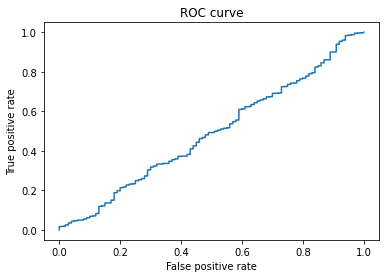

AUC -  0.48829900000000004
 ******************************Task2


100%|██████████| 10111/10111 [03:20<00:00, 50.41it/s]


(A)0 1
(P)---
0| 9761 45
1| 239 55
Recall is:0.187 ,Precision is:0.550,F1_score is:0.279,roc_auc is:0.938,Accuracy score is:0.972


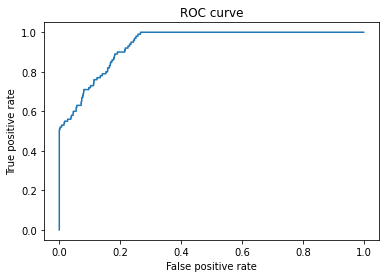

AUC -  0.937757
 ******************************Task2


In [42]:
if __name__ == "__main__":
    print('# **************************Task1************************************')
    Dict = [{'file':'5_a.csv','n_val':35345},{'file':'5_b.csv','n_val':14190}]
    for i,val in enumerate(Dict):   
        df = pd.read_csv(val['file'])
        df = df.sort_values(by='proba' ,kind='mergesort')
        df['Thresh'] = df.apply(lambda x:0 if x['proba'] < 0.5 else 1,axis=1)
        y_act_int=df.y
        y_pred_in_1=df.Thresh
        y_prob = df.proba
        matrix,unique_set,Recall,precision,F1_score,roc_auc,TPR,FPR,Accuracy_score = Results(y_act_int,y_pred_in_1,y_prob,val['n_val'])
        print('(A)' + ' '.join(str(x) for x in unique_set))
        print('(P)---')
        for i, x in enumerate(unique_set):
            print("%s| %s" % (x, ' '.join(str(x) for x in matrix[i]))) 
        print('Recall is:%.3f ,Precision is:%.3f,F1_score is:%.3f,roc_auc is:%.3f,Accuracy score is:%.3f'% (Recall,precision,F1_score,roc_auc,Accuracy_score))
        print_performance_metrics(FPR,TPR,roc_auc)
        print(end =" ******************************")
        print("Task2")

<font color='red'><b>C.</b></font> Compute the best threshold (similarly to ROC curve computation) of probability which gives lowest values of metric <b>A</b> for the given data <strong>5_c.csv</strong>
<br>

you will be predicting label of a data points like this: $y^{pred}= \text{[0 if y_score < threshold  else 1]}$

$ A = 500 \times \text{number of false negative} + 100 \times \text{numebr of false positive}$

<pre>
   <b>Note 1:</b> in this data you can see number of negative points > number of positive points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_c.csv</b>
</pre>

In [43]:
data = pd.read_csv('5_c.csv')
df = data.sort_values(by='prob' ,kind='mergesort',ascending=False)
n_val= 100

In [48]:
def best_Thresh(df):
    A=[]
    for i in df.iloc[:,1]:
        y_dash=np.array([1 if j>=i else 0 for j in df.iloc[:,1]])
        #creates y_pred according to given treshold values
        p1_conf = Calculate_Metrics(np.array(df.iloc[:,0]),np.array(y_dash),np.array(y_dash),n_val)
        c_m1,TN,FN,FP,TP = p1_conf.Confusion_Matrix()
        #calculates a according to given equation
        A.append(500*c_m1[0,1]+100*c_m1[1,0])
    c=A.index(min(A))             
    return df.iloc[c,1] 

In [49]:
best_Thresh(df)

0.2300390278970873

<pre>
<font color='red'><b>D.</b></font> Compute performance metrics(for regression) for the given data <strong>5_d.csv</strong>
    <b>Note 2:</b> use pandas or numpy to read the data from <b>5_d.csv</b>
    <b>Note 1:</b> <b>5_d.csv</b> will having two columns Y and predicted_Y both are real valued features
<ol>
<li> Compute Mean Square Error </li>
<li> Compute MAPE: https://www.youtube.com/watch?v=ly6ztgIkUxk</li>
<li> Compute R^2 error: https://en.wikipedia.org/wiki/Coefficient_of_determination#Definitions </li>
</ol>
</pre>

In [22]:
data=pd.read_csv("5_d.csv")
n = len(data)

# Mean Square Error 

The mean squared error tells you how close a regression line is to a set of points. It does this by taking the distances from the points to the regression line (these distances are the “errors”) and squaring them. The squaring is necessary to remove any negative signs.

In [25]:
Act = data.y
Pred = data.pred
sum_error = 0
for i in range(len(data)):
    err = (Act[i] - Pred[i])*(Act[i] - Pred[i])
    sum_error += err
mean_sq_er = (1/n)*(sum_error)
print("Mean square value is:",mean_sq_er)     

Mean square value is: 177.16569974554707


# MAPE

The formulae for MAPE is =Summation(((Actual_val-Predicted_val)/Actual_val)*100)/Total no of points in data
But,What if Actual_val==0,than summation will gets false ,To avoid this problem we took average of all actual points and replace Actual_val in denometer of MAPE formulae by this average


In [24]:
a=0
for i in tqdm(range(len(data))):
    a+=Act[i]
a_dash=a/n
abs_err_sum = 0
for i in tqdm(range(len(data))):
    err = abs(Act[i] - Pred[i])
    abs_err_sum += err
MAPE=(abs_err_sum * 100)/(a_dash*n)
print("Mape value is:",MAPE)   

100%|██████████| 157200/157200 [00:02<00:00, 65528.53it/s]

12.91202994009687


# 3. R^2 error

R-squared is a statistical measure of how close the data are to the fitted regression line. It is also known as the coefficient of determination, or the coefficient of multiple determination for multiple regression.

The definition of R-squared is fairly straight-forward; it is the percentage of the response variable variation that is explained by a linear model. Or:

R-squared = Explained variation / Total variation


In [24]:
a=0
for i in tqdm(range(len(data))):
    a+=Act[i]
A_dash=a/n
SS_tot=0
for i in tqdm(range(len(data))):
    s=(Act[i]-A_dash)*(Act[i]-A_dash)
    SS_tot+=s
SS_res=0
for i in tqdm(range(len(data))):
    s=(Act[i]-Pred[i])*(Act[i]-Pred[i])
    SS_res+=s
#print(SS_res)
A=SS_res/SS_tot
R_sqr_err=1-A
print("Rsquare value is:",R_sqr_err)
    

100%|██████████| 157200/157200 [00:04<00:00, 34974.87it/s]

0.9563582786990964
